#  <span style="color:blue"> Churn Analysis </span>

<img src=https://media.graphassets.com/FKK0M8eYTVqha8CnVHqW alt="Descrição da imagem" width="850"/>

## Link do Dataset

[Dataset de Churn de Clientes da Telco](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)

## Sobre o Dataset

**Contexto:**
O objetivo é prever o comportamento para reter clientes. É possível analisar todos os dados relevantes dos clientes e desenvolver programas de retenção focados. [IBM Sample Data Sets]

**Conteúdo:**
Cada linha representa um cliente, e cada coluna contém os atributos do cliente, conforme descrito na metadata das colunas.


## <span style="color:blue">O conjunto de dados inclui informações sobre:</span>

- **Clientes que cancelaram nos últimos 30 dias** – a coluna é chamada de Churn
- **Serviços aos quais cada cliente aderiu** – telefone, múltiplas linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico, e streaming de TV e filmes
- **Informações da conta do cliente** – há quanto tempo eles são clientes, tipo de contrato, método de pagamento, faturamento sem papel, cobranças mensais e cobranças totais
- **Informações demográficas dos clientes** – gênero, faixa etária, e se eles possuem parceiros e dependentes

|Features|Description|
|:--:|:--:|
|Gender| Whether the customer is a male or a female|
|Senior Citizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner| Whether the customer has a partner or not (Yes, No)|
|Dependents| Whether the customer has dependents or not (Yes, No)|
|Tenure| Number of months the customer has stayed with the company|
|Phone Service| Whether the customer has a phone service or not (Yes, No)|
|Multiple Line| Whether the customer has multiple lines or not (Yes, No, No phone service)|
|Internet Service| Customer’s internet service provider (DSL, Fiber optic, No)|
|Online Security| Whether the customer has online security or not (Yes, No, No internet service)|
|Online Backup| Whether the customer has online backup or not (Yes, No, No internet service)|
|Device Protection| Whether the customer has device protection or not (Yes, No, No internet service)
|Tech Support| Whether the customer has tech support or not (Yes, No, No internet service)|
|Streaming TV| Whether the customer has streaming TV or not (Yes, No, No internet service)|
|Streaming Movies| Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract| The contract term of the customer (Month-to-month, One year, Two year)|
|Paperless Billing| Whether the customer has paperless billing or not (Yes, No)|
|Payment Method| The customer’s payment method Electronic check, Mailed check, Bank transfer (automatic), Credit card|
|Monthly Charges| The amount charged to the customer monthly|
|Total Charges| The total amount charged to the customer|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import namedtuple
import cycler
%matplotlib inline

__version__ = '2022.10.04.dev1'

NordColors = namedtuple('NordColors', ['red', 'orange', 'yellow',
    'green', 'greenish', 'lightblue', 'blue', 'darkblue', 'purple'])
colors = NordColors(red='#bf616a', orange='#FAA88F', yellow='#ebcb8b',
    green='#8B887B', greenish='#8fbcbb', lightblue='#8B887B',
     blue='#81a1c1', darkblue='#5e81ac', purple='#b48ead')

    # colors used for lines on plots
color_cycle = [colors.red, colors.greenish, colors.lightblue, colors.purple, colors.greenish, 
                    colors.yellow, colors.red, colors.blue,
                   colors.green, colors.darkblue, colors.purple]
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color_cycle)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.grid'] = True

# spine ticks go inward (more consistent with journal standards)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

    # add a little padding around the ticks
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['ytick.major.pad'] = 10

    # larger fonts for better readability
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['xtick.labelsize']  = 9
plt.rcParams['ytick.labelsize']  = 9
plt.rcParams['axes.labelsize']   = 9
plt.rcParams['axes.titlesize']   = 12
plt.rcParams['legend.fontsize']  = 8

## <span style="color:blue">Problemas de Negócio</span>

1. **Qual é a dimensão do problema? Realmente temos um problema?**

2. **Podemos garantir que algumas informações demográficas estão impactando nossa taxa de cancelamento (churn)?**

3. **O tipo de contrato tem um impacto significativo no churn?**

4. **Algum método de pagamento aumenta a possibilidade de Churn?**

5. **Qual é a probabilidade de churn de clientes com 1 mês de tempo de permanência (tenure)"?**

6. **É possível prever o churn?**

In [2]:
raw = pd.read_csv('treinos_indiano.csv')

In [3]:
raw.shape

(7043, 21)

In [4]:
for i in raw.columns:
    if raw[i].isnull().sum():
        print(f'Coluna {i} tem dados nulos, rever')        

Ao decorrer da análise percebi alguns valores null mesmo não tendo aparecido na seção anterior para mim. Então consertei abaixo. 

Os valores vieram da coluna `TotalCharges`

In [5]:
raw['TotalCharges'] = raw['TotalCharges'].replace(' ', 0)
raw['TotalCharges'] = raw['TotalCharges'].astype(float)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
categorical = ['gender','SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 
                'PaperlessBilling',
                'PaymentMethod']

for i in categorical:
    print(f'Coluna {i}: {raw[i].unique()}')

Coluna gender: ['Female' 'Male']
Coluna SeniorCitizen: [0 1]
Coluna Partner: ['Yes' 'No']
Coluna Dependents: ['No' 'Yes']
Coluna PhoneService: ['No' 'Yes']
Coluna MultipleLines: ['No phone service' 'No' 'Yes']
Coluna InternetService: ['DSL' 'Fiber optic' 'No']
Coluna OnlineSecurity: ['No' 'Yes' 'No internet service']
Coluna OnlineBackup: ['Yes' 'No' 'No internet service']
Coluna DeviceProtection: ['No' 'Yes' 'No internet service']
Coluna TechSupport: ['No' 'Yes' 'No internet service']
Coluna StreamingTV: ['No' 'Yes' 'No internet service']
Coluna StreamingMovies: ['No' 'Yes' 'No internet service']
Coluna Contract: ['Month-to-month' 'One year' 'Two year']
Coluna PaperlessBilling: ['Yes' 'No']
Coluna PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Decidi setar todas `No services` para **No**

In [8]:
raw['MultipleLines'] = raw['MultipleLines'].replace('No phone service', 'No')
raw['OnlineSecurity'] = raw['OnlineSecurity'].replace('No internet service', 'No')
raw['OnlineBackup'] = raw['OnlineBackup'].replace('No internet service', 'No')
raw['DeviceProtection'] = raw['DeviceProtection'].replace('No internet service', 'No')
raw['TechSupport'] = raw['TechSupport'].replace('No internet service', 'No')
raw['StreamingTV'] = raw['StreamingTV'].replace('No internet service', 'No')
raw['StreamingMovies'] = raw['StreamingMovies'].replace('No internet service', 'No')

### Problema 1 -> Qual o tamanho do Problema?

In [9]:
raw.drop_duplicates(inplace=True)

In [10]:
amount_data = len(raw)
churn_count = raw['Churn'].value_counts()[1]
problem = churn_count/amount_data

print(f'We can say that {problem:.2%} of customers had cancelled contracts in this dataset')

We can say that 26.54% of customers had cancelled contracts in this dataset


In [11]:
#What is the error margin of that proportion? This is a truly issue in the company?

import statsmodels.stats.proportion as stpr

se = np.sqrt((problem * (1 - problem))/len(raw))

ci_prop1 = stpr.proportion_confint(count=churn_count, nobs=len(raw))

print(f'We have a Standart Error {se:.2f} and a IC (95%) {ci_prop1}')

We have a Standart Error 0.01 and a IC (95%) (0.25505819093335796, 0.2756815506540338)


Podemos observar que essa amostra indica um erro padrão (SE) de 0,01 em relação à verdadeira população, uma proporção muito confiável, e temos 95% de certeza de que a verdadeira diferença está entre 0,25 e 0,27. Ou seja, quase 30% dos clientes cancelaram os contratos, o que representa um grande problema para qualquer empresa.

### Problema 2 -> Alguma característica demográfica aumenta a possibilidade do Churn?

In [14]:
def table_churn(coluna):
    count_data = raw.groupby(by=coluna, as_index=False)['Churn'].value_counts().reset_index()
    count_data['perc'] = count_data['count']/count_data['count'].sum()
    return count_data

In [15]:
table_churn('PaymentMethod')

,index,PaymentMethod,Churn,count,perc
0,0,Bank transfer (automatic),No,1286,0.182593
1,1,Bank transfer (automatic),Yes,258,0.036632
2,2,Credit card (automatic),No,1290,0.183161
3,3,Credit card (automatic),Yes,232,0.032941
4,4,Electronic check,No,1294,0.183729
5,5,Electronic check,Yes,1071,0.152066
6,6,Mailed check,No,1304,0.185148
7,7,Mailed check,Yes,308,0.043731


In [61]:
#First lets copy our dataset for analyses

df = raw.copy()
df.drop(columns =
        {'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV','StreamingMovies','PaperlessBilling',
        'TotalCharges','customerID'}, inplace=True)

In [62]:
def plot_churn_categorical(coluna):
    count_data = raw.groupby(by=coluna, as_index=False)['Churn'].value_counts().reset_index()
    sns.barplot(data = count_data, x = coluna, y='count', hue='Churn')

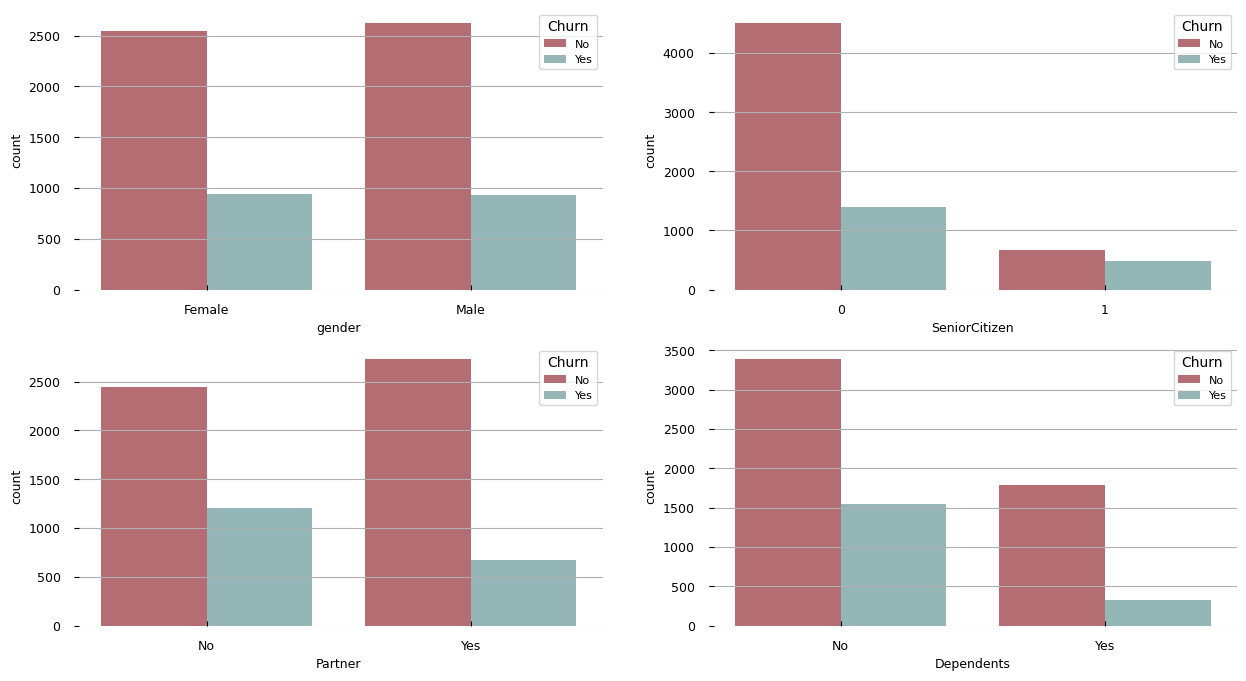

In [63]:
#We can assure that some Demographic Info are impacting our Churn?

list = ['gender','SeniorCitizen','Partner','Dependents']

plt.subplots(2,2,figsize=(15,8))
for i, j in enumerate(list):
    plt.subplot(2,2,i+1)
    plot_churn_categorical(j)
    

Com os dados demográficos, não podemos afirmar com certeza se uma característica demográfica aumenta a taxa de churn dado que estamos lidando com classes desbalanceadas. Portanto, utilizaremos algumas hipóteses estatísticas para confirmar essas diferenças.

### Hipóteses

**Hipótese 1:**
- \( $H_0$ \): *Cidadãos seniores têm a mesma taxa de churn que não-cidadãos seniores.*
- \( $H_a$ \): *Cidadãos seniores têm uma taxa de churn maior que não-cidadãos seniores.*

**Hipótese 2:**
- \( $H_0$ \): *Clientes com parceiro têm a mesma taxa de churn que clientes sem parceiro.*
- \( $H_a$ \): *Clientes com parceiro têm uma taxa de churn maior que clientes sem parceiro.*

**Hipótese 3:**
- \( $H_0$ \): *Clientes com dependentes têm a mesma taxa de churn que clientes sem dependentes.*
- \( $H_a$ \): *Clientes com dependentes têm uma taxa de churn maior que clientes sem dependentes.*

Utilizaremos o teste \( $z$ \) para proporções em dois grupos, que parece ser o teste mais apropriado para essa análise.

Aqui partimos de alguns pressupostos:

1. A quantidade de amostra nos permite usar um teste parmétrico mesmo que a distribuição não seja normal, podemos acreditar que sua, média ou proporção se aproxima de uma normal dado o Teorema do Limite Central
2. Testes de Proporção não pressupõem igualdade de variãncias

In [19]:
import scipy.stats as st
import numpy as np

def prop (df_member, classe, detalhe1, detalhe2):
    control_group = df_member.loc[df_member[classe] == detalhe1].groupby(by=classe, 
                                                                           as_index=False)['Churn'].value_counts().reset_index()
    qtd_control_ = control_group.loc[control_group['Churn'] == 'Yes']['count'][1]
    size_control_group = len(df_member.loc[df_member[classe] == detalhe1])

    control_exp = df_member.loc[df_member[classe] == detalhe2].groupby(by=classe, 
                                                                           as_index=False)['Churn'].value_counts().reset_index()
    qtd_exp_ = control_exp.loc[control_exp['Churn'] == 'Yes']['count'][1]
    size_exp_group = len(df_member.loc[df_member[classe] == detalhe2])

    prop_controle = (control_group.loc[control_group['Churn'] == 'Yes']['count'][1])/size_control_group
    prop_experimental = (control_exp.loc[control_exp['Churn'] == 'Yes']['count'][1])/size_exp_group

    z_statistic, p_value = stpr.test_proportions_2indep(
        count1= qtd_control_, 
        nobs1=size_control_group, 
        count2=qtd_exp_, 
        nobs2=size_exp_group, alternative='larger')
    conf_int = stpr.confint_proportions_2indep(
        count1= qtd_control_, 
        nobs1=size_control_group, 
        count2=qtd_exp_, 
        nobs2=size_exp_group)
    
    if p_value > 0.05:
        print(f'Grupo positivo não apresentou maior Churn que o grupo negativo - {p_value:.2f}')
        plot_curve(z_statistic,prop_controle,prop_experimental, size_control_group,size_exp_group, 
                   (prop_controle-prop_experimental),-0.2, 0.2 )
    else:
        print(f'Valor p menor que nível de significância portanto rejeitamos a hipótese nula - {p_value:.3f}\nIC {conf_int}')
        print(f'Estatistico do teste {z_statistic}')
        print(f'Proporção Grupo controle{prop_controle}')
        print(f'Proporção Grupo controle{prop_experimental}')
        print(f'Tamanho Grupo Controle {size_control_group}, grupo experimental {size_exp_group}')
        print(f'Diferença: {(prop_controle-prop_experimental)}')

def plot_curve(statistic, prop1, prop2, tamanho1, tamanho2, dif, inicio, fim):

    lista_valores_para_equiparar_t1 = np.arange(inicio, fim, 0.0001)
    lista_b_ponto_t1 = [] #lista vazia que irá receber b pontual
    lista_b_ac_t1 = []
    p = ((prop1*tamanho1) + (prop2*tamanho2))/(tamanho1 + tamanho2)
    se = np.sqrt(p * (1-p)*((1/tamanho1)+(1/tamanho2)))
    diff_critic = 1.96 * se
    nosso_b_t1 = st.norm.pdf((dif - diff_critic)/se)
    for i in lista_valores_para_equiparar_t1:
        zha = (diff_critic-i )/se
        beta_pontual = st.norm.pdf(zha)
        beta_acumulado = st.norm.cdf(zha)
        lista_b_ponto_t1.append(beta_pontual)
        lista_b_ac_t1.append(beta_acumulado)
    
    alpha = 0.05
    z_prop_critc = st.norm.ppf(1 - alpha)
    x2 = np.linspace(-5, 5, 10000)
    y_t_2 = st.norm.pdf(x2)

    f, ax = plt.subplots(1,2,figsize=(15, 4))

    sns.lineplot(x=x2, y=y_t_2, color='blue', ax=ax[0])
    ax[0].scatter(x=statistic, y=st.norm.pdf(statistic), color='tomato', linewidths=0.5, 
                  edgecolors='red', label='Nosso Z estatístico')
    ax[0].fill_between(x2, 0, y_t_2, where=(x2 > z_prop_critc), color='red', alpha=0.2, label='Zona de Rejeição alpha (IC 95%)')
    ax[0].set_title('Curva de Densidade da Distribuição (z)', fontsize=12)
    ax[0].set_xlabel('Valores de (z)')
    ax[0].set_ylabel('Densidade de Probabilidade')
    ax[0].legend(loc='upper left')
    ax[0].text(x=statistic, y=st.norm.pdf(statistic) + 0.01, s=f'Valor Z: {statistic:.2f}', fontsize=12)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    

    ax[1].set_title('Curva de OC', fontsize = 12, pad = 10)
    sns.lineplot(x = lista_valores_para_equiparar_t1, y = lista_b_ponto_t1, label='Curva Padrão',ax=ax[1])
    sns.lineplot(x = lista_valores_para_equiparar_t1, y = lista_b_ac_t1, label='Curva Acumulada', ax=ax[1])
    ax[1].set_xlabel('Hipóteses Alternativas')
    ax[1].set_ylabel('Probabilidade Erro Tipo II (β)')
    ax[1].scatter(x = dif, y = nosso_b_t1, label='Probabilidade do nosso teste', color='blue')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].legend()

    plt.show()


In [20]:
prop(df,'SeniorCitizen',1 , 0)

Valor p menor que nível de significância portanto rejeitamos a hipótese nula - 0.000
IC (0.15041511072227032, 0.21148638404096204)
Estatistico do teste 11.597302490721786
Proporção Grupo controle0.4168126094570928
Proporção Grupo controle0.23606168446026096
Tamanho Grupo Controle 1142, grupo experimental 5901
Diferença: 0.18075092499683185


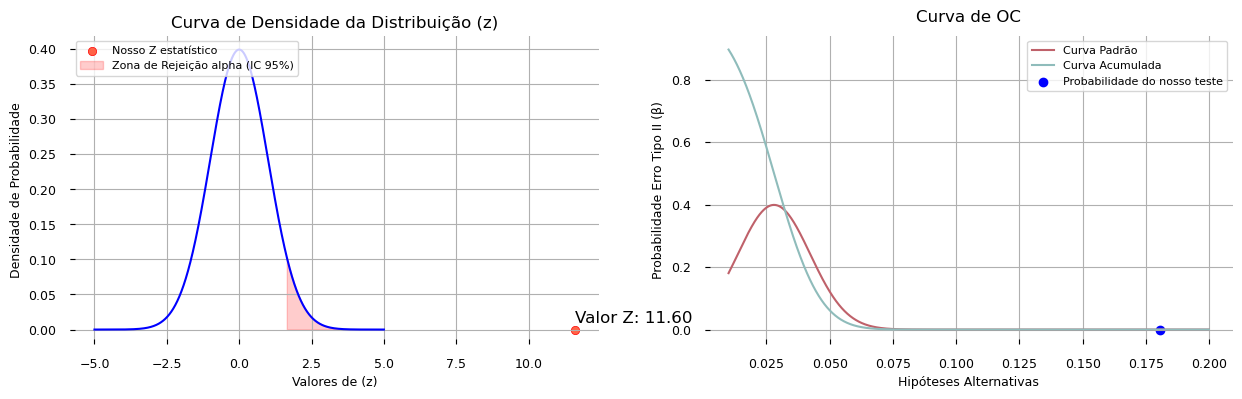

In [21]:
plot_curve(11.597302490721786,0.4168126094570928,0.23606168446026096,1142 , 5901, 0.18075092499683185, 0.01, 0.2)

Grupo positivo não apresentou maior Churn que o grupo negativo - 1.00


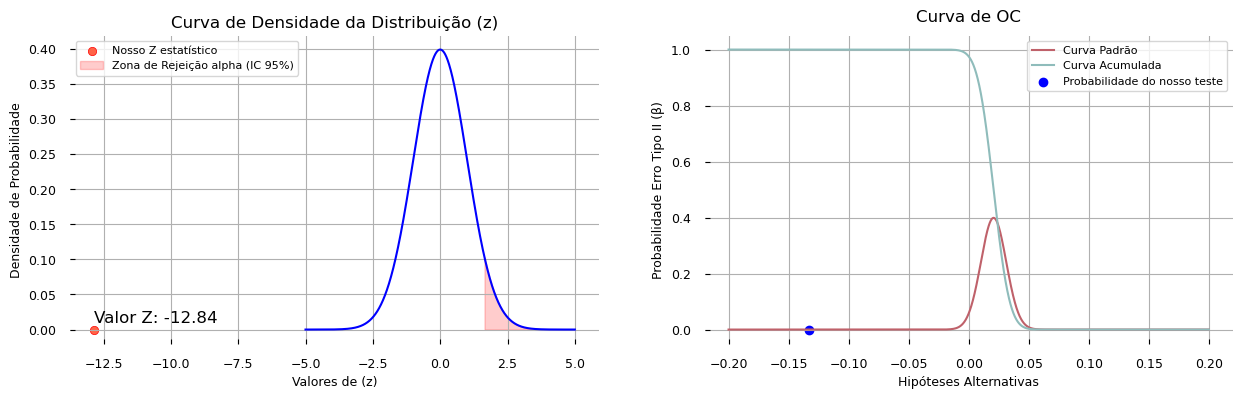

In [22]:
prop(df,'Partner', 'Yes', 'No')

Grupo positivo não apresentou maior Churn que o grupo negativo - 1.00


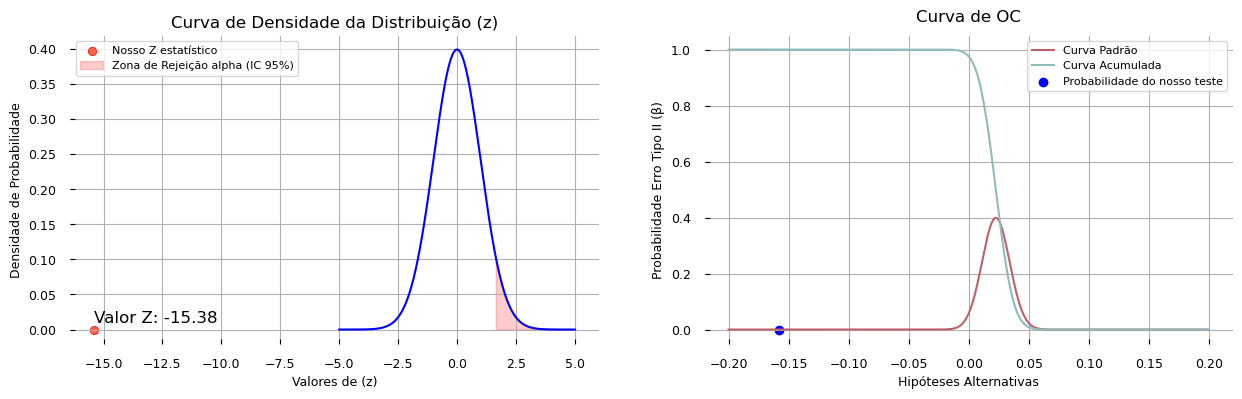

In [23]:
prop(df,'Dependents', 'Yes', 'No')

Grupo positivo não apresentou maior Churn que o grupo negativo - 0.77


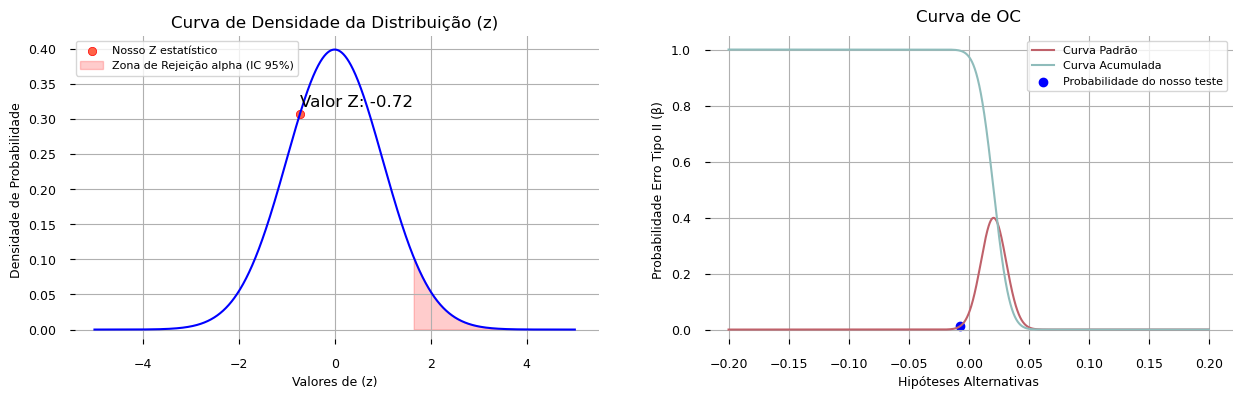

In [24]:
prop(df,'gender', 'Male', 'Female')

Podemos notar que a característica demográfica mais impactante na taxa de churn é a senioridade. Pessoas mais idosas tendem a abandonar os serviços de telecomunicações com maior frequência.</br>
Sobre as demais, não possuímos significância o suficiente para Rejeitar a $H_0$

### Problema 3 e 4 -> Algum tipo de contrato e método de pagamento impactam o Churn?

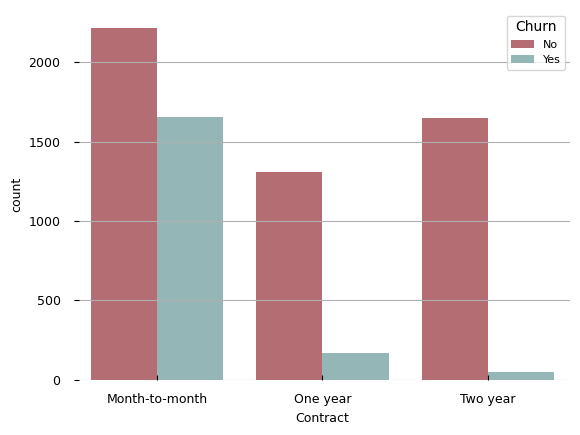

In [25]:
#That type of contract have a significant impact on Churn?

plot_churn_categorical('Contract')

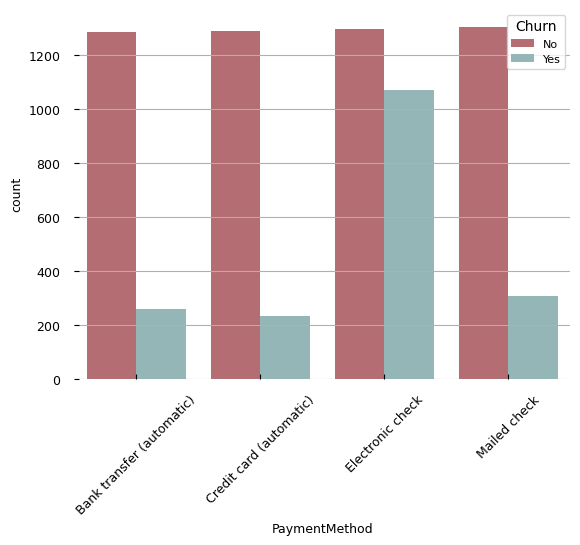

In [238]:
plot_churn_categorical('PaymentMethod')
plt.xticks(rotation=45)
plt.show()

In [26]:
df.groupby(by='Contract', as_index=False)['Contract'].value_counts()

,Contract,count
0,Month-to-month,3875
1,One year,1473
2,Two year,1695


Podemos notar que cliente de contrato mensal de de pagamento eletrônico possuem alto Churn

### Problema 5 -> Probablidade de Churn para clientes de permanência de 1 mês

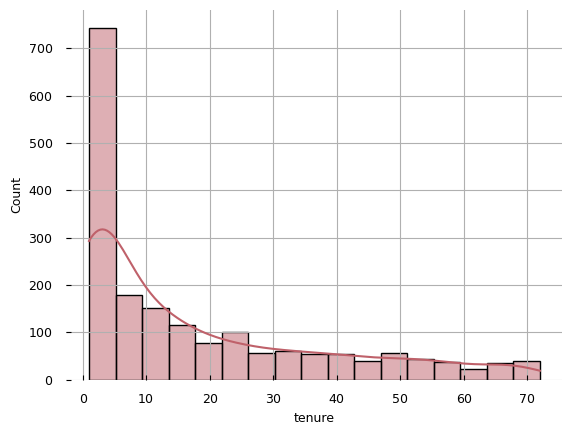

In [64]:
sns.histplot(df.loc[df['Churn'] == 'Yes']['tenure'], kde=True)
plt.show()

Como esperado, clientes com menos de 1 mês de permanência apresentam o nível mais alto de churn. No entanto, podemos calcular a probabilidade disso?

Estamos lidando com uma variável discreta e, considerando que a distribuição se assemelha a uma distribuição gama, optamos pela distribuição de Poisson para calcular a probabilidade

Temos uma quantidade extraordinária de clientes que cancelaram até 2 meses.


In [28]:
#first lets find lambda (mean of churn by month) 
df_1_months_fidelity = df.loc[df['tenure'] <= 1]
mean = df_1_months_fidelity.loc[df_1_months_fidelity['Churn'] == 'Yes']['Churn'].value_counts()[0]/df_1_months_fidelity['tenure'].sum()
#now we multiplicate this value for 12 -> then we have a mean of churn of a client with 12 months od fidelity
mean

0.6199021207177814

In [29]:
#(0, mean) -> this calculate the probabilitie of 0 churn 
prob_churn_12_months = st.poisson.pmf(1, mean) #prob 1 churn in 1 months fidelity customer


In [30]:
prob_churn_12_months*100

33.35055393785848

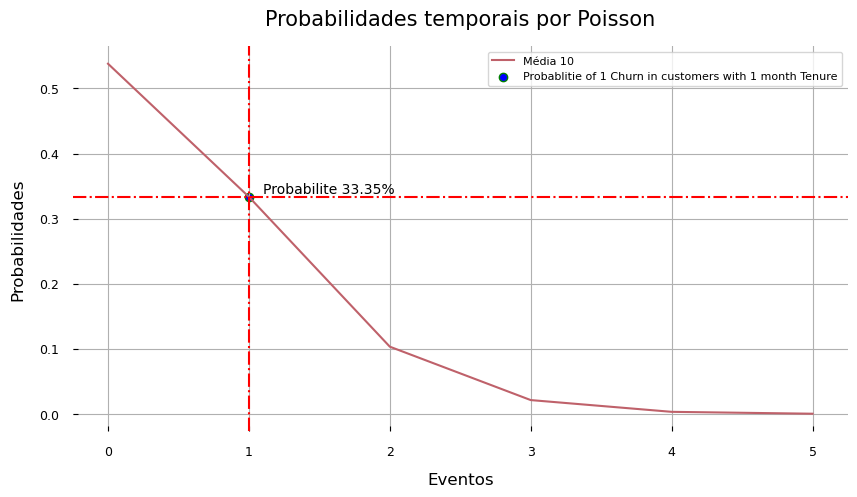

In [31]:
f1 = []
lista_rep2 = tuple(range(0,6,1))
for i in lista_rep2:
    value = st.poisson.pmf(i,mean)
    f1.append(value)

dict = {'Tentativas':lista_rep2,
        'Prob10':f1}

df_poisson = pd.DataFrame(dict)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Probabilidades temporais por Poisson', fontsize=15, pad=15)
sns.lineplot(df_poisson, x=df_poisson['Tentativas'], y=df_poisson['Prob10'], label='Média 10',ax=ax)
ax.set_xlabel(xlabel='Eventos', labelpad=10, fontsize=12)
ax.set_ylabel(ylabel='Probabilidades', labelpad=10, fontsize=12)
ax.axvline(1, linestyle='-.', color='r')
ax.axhline(prob_churn_12_months, linestyle='-.', color='r')
plt.scatter(1, prob_churn_12_months,edgecolors='green', color='b',
                 label='Probablitie of 1 Churn in customers with 1 month Tenure')
plt.text(x = 1.1, y= prob_churn_12_months+0.005, s=f'Probabilite {prob_churn_12_months:.2%}')
plt.legend()
plt.show()

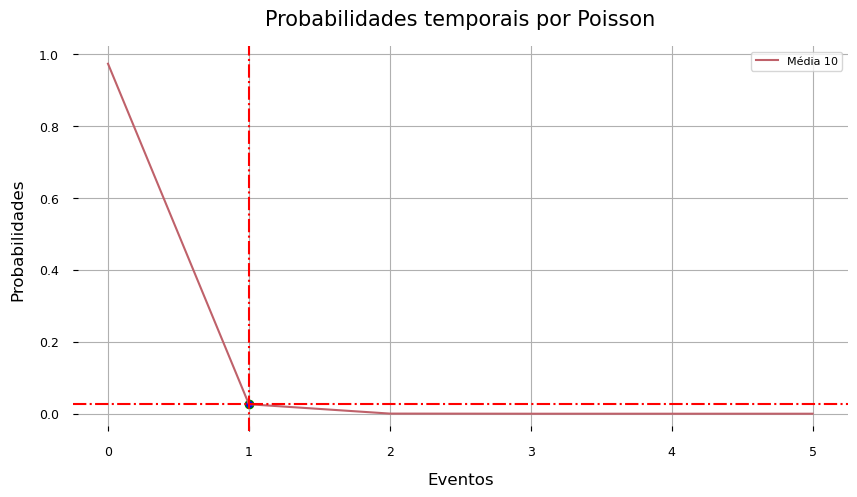

In [32]:
#first lets find lambda (mean of churn by month) 
df_1_months_fidelity = df.loc[df['tenure'] == 12]
mean = df_1_months_fidelity.loc[df_1_months_fidelity['Churn'] == 'Yes']['Churn'].value_counts()[0]/df_1_months_fidelity['tenure'].sum()
#now we multiplicate this value for 12 -> then we have a mean of churn of a client with 12 months od fidelity
#(0, mean) -> this calculate the probabilitie of 0 churn 
prob_churn_12_months = st.poisson.pmf(1, mean) #prob 1 churn in 1 months fidelity customer
f1 = []
lista_rep2 = tuple(range(0,6,1))
for i in lista_rep2:
    value = st.poisson.pmf(i,mean)
    f1.append(value)

dict = {'Tentativas':lista_rep2,
        'Prob10':f1}

df_poisson = pd.DataFrame(dict)

probabilite_till_3_churn = st.poisson.cdf(3, mean)

plt.figure(figsize=(10,5))
plt.title('Probabilidades temporais por Poisson', fontsize=15, pad=15)
sns.lineplot(df_poisson, x=df_poisson['Tentativas'], y=df_poisson['Prob10'], label='Média 10')
plt.xlabel(xlabel='Eventos', labelpad=10, fontsize=12)
plt.ylabel(ylabel='Probabilidades', labelpad=10, fontsize=12)
plt.axvline(1, linestyle='-.', color='r')
plt.axhline(prob_churn_12_months, linestyle='-.', color='r')
plt.scatter(1, prob_churn_12_months,edgecolors='green', color='b' )
plt.legend()
plt.show()

Podemos observar que há uma probabilidade de 33% de que clientes com 1 mês de fidelidade apresentem pelo menos um caso de churn. No entanto, para clientes com 1 ano de fidelidade, a probabilidade é muito mais baixa, chegando perto de 0%.

Concluímos que devemos concentrar esforços em converter mais contratos de 1 ano para reduzir a taxa de churn, especialmente entre clientes seniores.

Essa conclusão é corroborada pelo grande número de assinaturas do tipo "Month-to-Month".

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conslusões da parte 1:

Problema de Churn é algo a se levar em conta, tendo alcançado 30%

Clientes com de contrato mensal e de pagamento eletrônico tem alta probabilidade de churn

Demograficamente, apenas Sêniors possuem chances mais altas de Churn

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Problema 6 -> Podemos Prever o Churn?

5. 1 Pré-processing dos dados (ajustado dados para modelo)

In [33]:
ml_data = raw.copy()

In [34]:
ml_data['SeniorCitizen'] = ml_data['SeniorCitizen'].map({1 : 'Yes', 0: 'No'})

- Não temos variáveis categóricas ordinais, o que significa que devemos usar um método de codificação adequado para variáveis sem valor ordinal. Nesse caso, o uso do `OneHotEncoder` é apropriado.

- Também estamos lidando com valores numéricos com alta variância, como `'MonthlyCharges'` e `'TotalCharges'`. É recomendável padronizar esses valores para utilizar modelos, pois isso ajuda a garantir que os modelos funcionem de maneira eficiente. No entanto, é importante ter em mente que essa padronização pode complicar a avaliação ou análise do modelo.


In [35]:
numeric_data = ['tenure','MonthlyCharges']
categorical_data = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']

Escolhi excluir a variável `'TotalCharges'` porque parece ser uma variável complexa (sendo apenas a soma de valores). Sua variância é muito alta, o que pode impactar o modelo, fazendo com que as previsões sejam fortemente influenciadas por essa variável.

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedShuffleSplit

X = ml_data.drop(columns={'Churn','customerID','TotalCharges'})
y = ml_data['Churn'].map({'Yes':1, 'No':0})

#Decidido o uso do StratifiedShuffleSplit dado que podemos ter dados desbalanceados
#entre as features
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



# Encoding de várias colunas
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), 
     ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 'InternetService', 
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
      'TechSupport', 'StreamingTV', 'StreamingMovies', 
      'Contract', 'PaperlessBilling', 'PaymentMethod']))

Standard_Scaler = StandardScaler()
x_scaled = Standard_Scaler.fit_transform(X_train[numeric_data])
X_train[numeric_data] = x_scaled

# Transforming
transformed = transformer.fit_transform(X_train)
# Recriando X_train com dados transformados
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.index = X_train.index
# Unindo Tabelas
X_train = pd.concat([X_train, transformed_df], axis=1)
# Dropando Coluna Churn
X_train.drop(categorical_data[:-1], axis=1, inplace=True)

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_20436\3406290473.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_data] = x_scaled


In [37]:

transformed = transformer.fit_transform(X_test)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = X_test.index
# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)
# Dropping old categorical columns
X_test.drop(categorical_data[:-1], axis=1, inplace=True)

Devido ao grande desbalanceamento do target, não é suficiente apenas atribuir pesos à classe com menor proporção. Nesse cenário, o uso do `SMOTE (Synthetic Minority Over-sampling Technique)` é ideal.

Quando trabalhamos com dados desbalanceados, o modelo tende a prever com mais precisão a classe do target com maior proporção, pois ele aprende mais sobre essa classe. Neste caso, temos um número maior de casos de "Não Churn" (0). Portanto, o modelo pode ter um desempenho melhor na previsão da classe 0, resultando em numerosos falsos negativos e falsos positivos para a classe minoritária.


In [38]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=42)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)
x_test, y_test = smote.fit_resample(X_test, y_test)

### Escolha do Modelo

Como estamos lidando com diversos dados categóricos, optaremos por modelos não paramétricos e baseados em árvores.

Consideraremos os seguintes pontos:

1. Temos mais características binárias do que numéricas, o que indica uma relação complexa entre o target e as variáveis, incluindo algumas logísticas.
2. O cliente não espera dados de extrapolação.
3. O cliente precisa de alta precisão (solicitou uma precisão de 90%), mesmo que isso implique em menor revocação.
4. O cliente precisa avaliar como as características mais importantes impactam a previsão.

Comentando sobre o primeiro e segundo pontos, esses fatores já nos ajudam na escolha do modelo. Decidimos iniciar com o Random Forest devido à sua robustez em lidar com relações complexas e sua capacidade de fornecer previsões de alta precisão.

Portanto, vamos implementar uma árvore de decisão simples seguindo os seguintes passos:

#### Implementação

1. **Definir as características mais importantes.**

2. **Retreinar o modelo utilizando GridSearch.**

3. **Refinar o modelo ajustando `max_features` e `n_estimators`.**

4. **Verificar a matriz de confusão, precisão e revocação no conjunto de teste. Avaliar o overfitting.**

5. **Podar a árvore. Analisar a quantidade de amostras, profundidade e folhas para decidir a melhor configuração e usar o parâmetro `cc` para determinar a profundidade ideal.**

6. **Retreinar o modelo e verificar os scores. Aplicar um threshold para alcançar um limiar de 85% de precisão.**



In [92]:
from sklearn.ensemble import RandomForestClassifier

tree_clf = RandomForestClassifier()
tree_clf.fit(X_smote_train, y_smote_train)


RandomForestClassifier()

- Retreinando modelo com GridSearchCV e features selecionadas

In [93]:
from sklearn.model_selection import GridSearchCV

#vamos usar para apenas prever n_estimators sendo um dos param mais importantes

param_grid = [{
    'n_estimators': np.arange(100, 600, 100)
}]

grid = GridSearchCV(tree_clf, param_grid, cv=3, return_train_score=True, n_jobs=-1)
grid.fit(X_smote_train, y_smote_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'n_estimators': array([100, 200, 300, 400, 500])}],
             return_train_score=True)

In [94]:
grid.best_params_

{'n_estimators': 400}

In [135]:
tree_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1)
tree_clf.fit(X_smote_train, y_smote_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1)

- Avaliando modelo em dados de teste (verificando overfitting)

In [141]:
tree_clf.score(X_smote_train, y_smote_train) #overfitting

0.998550374486591

In [140]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

cross_val_score(tree_clf, X_smote_train, y_smote_train, cv=3, scoring='accuracy')

array([0.76449275, 0.8909025 , 0.88184125])

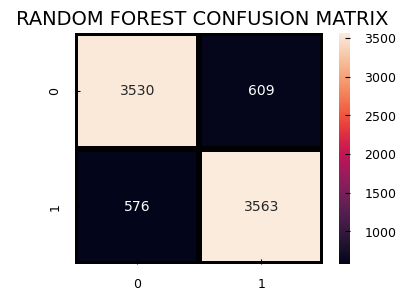

In [138]:
y_pred = cross_val_predict(tree_clf, X_smote_train, y_smote_train)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_smote_train, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.grid(False)
plt.show()

O modelo apresentou uma boa interpretação do target, com uma taxa de acerto superior a 80%. No entanto, parece que o modelo tende a gerar mais falsos negativos. De maneira geral, o modelo parece atender bem aos requisitos. Contudo, há espaço para melhorias, especialmente considerando que o cliente requer uma precisão de 90%, independentemente do recall.

In [139]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_smote_train, y_pred))
print(recall_score(y_smote_train, y_pred))

0.8540268456375839
0.8608359507127326


### Floresta Aleatória: Funcionamento e Parâmetros

A Floresta Aleatória é um algoritmo que constrói múltiplas árvores de decisão, sendo uma extensão das Árvores de Decisão. No nosso caso, optamos por criar 400 árvores, como indicado pelo GridSearch. Esse tipo de algoritmo é útil para evitar overfitting, pois combina os resultados de diversas árvores de decisão, cada uma construída com um subconjunto diferente dos dados.

#### Como funcionam as Árvores de Decisão:

1. **Splits Locais**: As árvores de decisão funcionam criando splits locais nos dados para minimizar uma função de perda. Esses splits têm como objetivo maximizar a homogeneidade dos dados dentro de cada nó filho. Isso é feito calculando qual variável e qual valor da variável geram a maior redução de impureza nos nós.
   
2. **Previsão**: Cada árvore individual pode ter splits locais ótimos, mas pode não alcançar o **ótimo global**. Como resultado, a previsão de uma árvore de decisão pode estar sujeita a erros por estar muito ajustada a particularidades dos dados de treino. No entanto, a Floresta Aleatória supera isso criando várias árvores de decisão independentes, cada uma com subconjuntos aleatórios de dados e variáveis.
   
   A previsão final da Floresta Aleatória é dada pela **moda** das previsões feitas por todas as árvores. Ou seja, a classe mais votada pelas árvores é escolhida como a previsão final. Isso ajuda a suavizar variações e melhora a capacidade do modelo de generalizar para novos dados.

#### Por que usar múltiplas árvores (n_estimators)?

A criação de múltiplas árvores (n_estimators) melhora a robustez do modelo. Quando temos apenas uma árvore de decisão, ela pode ajustar-se demais aos dados de treino (overfitting), gerando previsões ruins em dados novos. Ao criar várias árvores, obtemos uma média (ou moda) das previsões, reduzindo a variância e, portanto, criando um modelo mais estável. 

No nosso caso, usamos 400 árvores, conforme sugerido pelo GridSearch, para garantir que o modelo capture de forma robusta as relações complexas entre as variáveis sem overfitting.

#### Seleção de max_features

O parâmetro `max_features` controla o número de variáveis que cada árvore considera para cada split. Definir esse parâmetro corretamente é importante, pois ele afeta a diversidade das árvores e, consequentemente, a performance do modelo.

- Quando `max_features` é pequeno, cada árvore será treinada com diferentes variáveis, criando uma maior diversidade entre as árvores. Isso reduz a correlação entre elas e ajuda a evitar overfitting.
- Quando `max_features` é grande, cada árvore usa quase todas as variáveis disponíveis, o que pode resultar em árvores semelhantes e menos diversidade.

Em geral, ajustamos `max_features` para maximizar a função de perda (Loss Function) usada para medir a impureza dos nós, como Gini ou Entropia.

#### Função de Perda: Gini e Entropia

A **Função de Perda** é usada para calcular a impureza em cada split. Dois critérios comuns são:

##### 1. Índice de Gini

O índice de Gini mede a impureza de um nó, sendo calculado pela fórmula:


Gini = 1 - $\sum_{i=1}^{n} p_i^2$


Onde \( $p_i$ \) é a proporção de amostras da classe \($i$\) no nó. Quanto menor o valor do Gini, mais puro é o nó.

##### 2. Entropia

A entropia, também usada para medir impureza, é calculada pela fórmula:


Entropy = - $\sum_{i=1}^{n} p_i \log_2(p_i)$


Onde \( $p_i$ \) é a proporção de amostras da classe \($i$\) no nó. A entropia é uma medida da incerteza; quanto menor a entropia, mais puro é o nó.

#### Considerações Finais

Em resumo, a Floresta Aleatória constrói várias árvores independentes e faz previsões com base na moda dos resultados. A escolha de `n_estimators` e `max_features` é crucial para equilibrar a precisão do modelo e evitar overfitting. Definir muitos estimadores e limitar as variáveis por split (max_features) cria um modelo robusto e generalizável para novas amostras. Ao otimizar o modelo com GridSearch, encontramos os valores adequados desses parâmetros, como usar 400 árvores e selecionar um número de variáveis que maximizem a redução da impureza dos nós.



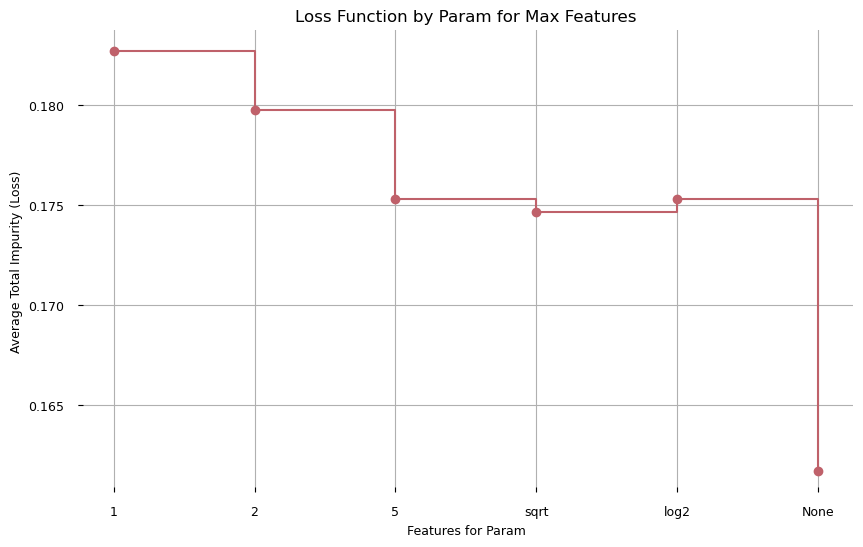

In [127]:
# Função para calcular a entropia
def calculate_entropy(probs):
    return -np.sum([p * np.log2(p) for p in probs if p > 0])

# Função para calcular a impureza (gini ou entropia)
def calculate_impurity(tree, X, criterion='gini'):
    impurities = []
    # Obter as folhas
    node_counts = tree.tree_.n_node_samples
    values = tree.tree_.value  # Probabilidades de cada classe em cada nó
    
    # Para cada nó
    for i in range(len(node_counts)):
        node_value = values[i][0]
        probs = node_value / node_value.sum()  # Obter as probabilidades das classes
        
        if criterion == 'gini':
            impurity = 1 - np.sum(probs ** 2)
        elif criterion == 'entropy':
            impurity = calculate_entropy(probs)
        impurities.append(impurity)
    return np.mean(impurities)  # Média da impureza dos nós

# Valores de max_features para testar
max_features_values = [1, 2, 5, 'sqrt', 'log2', None]

# Armazenar os resultados
impurity_scores = {}

# Loop para ajustar florestas com diferentes valores de max_features
for features in max_features_values:
    forest_clf = RandomForestClassifier(max_features=features, criterion='gini', n_estimators=400,
                                        max_depth=None, min_samples_split=2, random_state=50)
    forest_clf.fit(X_smote_train, y_smote_train)
    
    # Calcular impureza para cada árvore
    impurities = [calculate_impurity(tree, X_smote_train, criterion='gini') for tree in forest_clf.estimators_]
    
    # Média da impureza para todas as árvores
    impurity_scores[features] = np.mean(impurities)

df_loss_features = pd.DataFrame.from_dict(impurity_scores, orient='index', columns=['Score'])

plt.figure(figsize=(10, 6))
plt.plot(df_loss_features.index.astype(str), df_loss_features['Score'], marker='o', drawstyle="steps-post")
plt.xlabel("Features for Param")
plt.ylabel("Average Total Impurity (Loss)")
plt.title("Loss Function by Param for Max Features")
plt.grid(True)
plt.show()

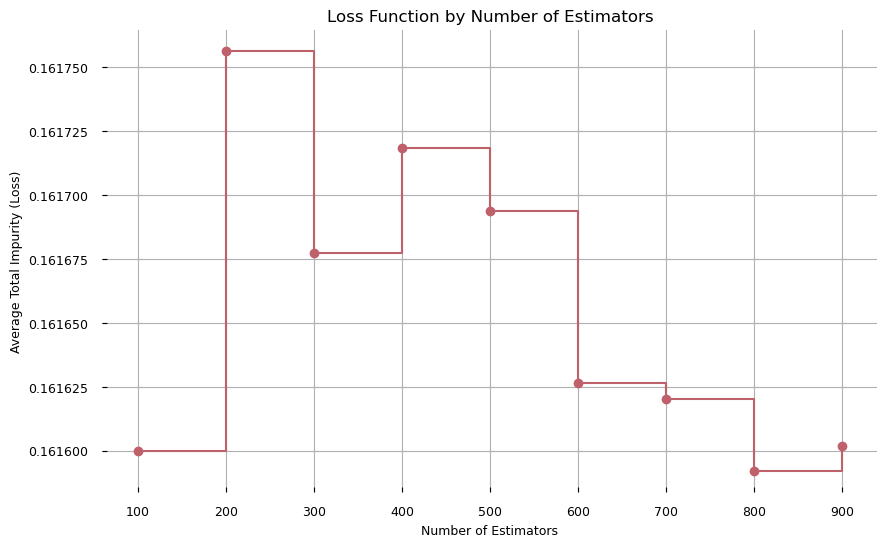

In [128]:
# Definir a lista de tamanhos da floresta
lista = np.arange(100, 1000, 100)
impurity_scores = {}

for i in lista:
    # Ajustar um modelo de RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=i,
                                        max_features=None,
                                        max_depth=None, min_samples_split=2, n_jobs=-1, criterion='gini',
                                        random_state=50)
    forest_clf.fit(X_smote_train, y_smote_train)
    
    # Calcular a impureza para cada árvore na floresta
    impurities = [calculate_impurity(tree, X_smote_train, criterion='gini') for tree in forest_clf.estimators_]
    
    # Média da impureza para todas as árvores
    impurity_scores[i] = np.mean(impurities)

# Converter os resultados em DataFrame
df_loss_features = pd.DataFrame.from_dict(impurity_scores, orient='index', columns=['Score'])

# Visualizar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_loss_features.index.astype(str), df_loss_features['Score'], marker='o', drawstyle="steps-post")
plt.xlabel("Number of Estimators")
plt.ylabel("Average Total Impurity (Loss)")
plt.title("Loss Function by Number of Estimators")
plt.grid(True)
plt.show()

Analisando ambos os gráficos optei por usar `max_features = None` e `n_estimators = 600` para manter um mínimo aceitável de Loss Function, minimizando a impureza

In [142]:
tree_clf = RandomForestClassifier(n_estimators=600, max_features=None,
                                  max_depth=None,  min_samples_split=2,
                                  n_jobs=-1, criterion='gini',
                                  oob_score = True)

tree_clf.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_features=None, n_estimators=600, n_jobs=-1,
                       oob_score=True)

In [143]:
tree_clf.score(X_smote_train, y_smote_train)

0.998550374486591

Modelo ainda tende à alta variância. Vamos penalizar ele um pouco. Um bom método de penalização é o parâmetro `ccp_alpha`. Esse parâmetro contralo a Poda das várias árvores de decisão. A ideia é diminuir a variância do modelo e trazer melhor generalização. Como definimos max_features e n_estimators que trazem a Loss Fuction menor, isso tende a overfitting do modelo, portanto melhorar o modelo com uma penalização se faz necessário para não haver muitos problemas com novos dados

Vamos comparar alguns valores de ccp_alpha com a acurácia do modelo, tentando diminuir sua variância

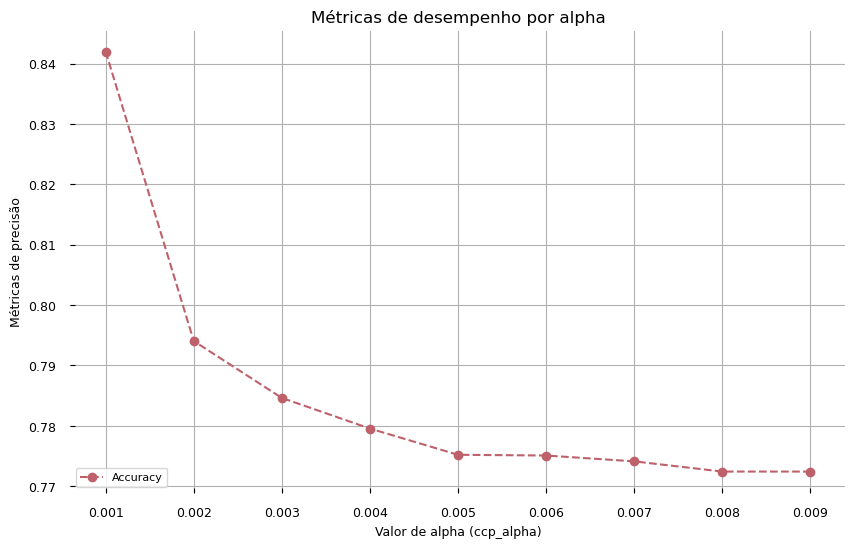

In [223]:
accuracy = []

list_values = np.arange(0.001, 0.01, 0.001)

for i in list_values:
    arvore_for_ccp = RandomForestClassifier(n_estimators=600,
                                        max_features=None,
                                        max_depth=None, min_samples_split=2, n_jobs=-1, criterion='gini',
                                        random_state=50, ccp_alpha=i)
    arvore_for_ccp.fit(X_smote_train, y_smote_train)
    acc = arvore_for_ccp.score(X_smote_train, y_smote_train)
    y_pred = arvore_for_ccp.predict(X_smote_train)
    accuracy.append(acc)

plt.figure(figsize=(10,6))
plt.plot(list_values, accuracy, marker='o', label='Accuracy', linestyle='--')
plt.title('Métricas de desempenho por alpha')
plt.xlabel('Valor de alpha (ccp_alpha)')
plt.ylabel('Métricas de precisão')
plt.legend(loc='lower left')
plt.show()

Gosto de pensar que accuracys entre 75% são boas para bons generalizadores. Portanto escolhi ccp_alpha = 0.003. A partir dele a accuracy praticamente se mantém a mesma. E aumentando o ccp_alpha sem melhora siginfica que estou alterando muito de forma aleatória o modelo sem um sentido lógico por de trás

In [224]:
#Modelo com os valores escolhidos
#n_estimators = 600
#max_features = None
#max_depth = None e  min_samples_split=2 -> recomendações do próprio Sklearn
tree_clf = RandomForestClassifier(n_estimators=600, max_features=None,
                                  max_depth=None,
                                  n_jobs=-1, criterion='gini',
                                  oob_score = True,  min_samples_split=2,
                                  ccp_alpha=0.003)

tree_clf.fit(X_smote_train, y_smote_train)

RandomForestClassifier(ccp_alpha=0.003, max_features=None, n_estimators=600,
                       n_jobs=-1, oob_score=True)

In [228]:
tree_clf.score(X_smote_train, y_smote_train) #reduzimos a acc do modelo de 99% para 78% em aproximado
#conseguimos, teoricamente, fugir do overfitting

0.7836433921237014

In [226]:
from sklearn.metrics import classification_report

#Métricas de evaluation
y_pred = cross_val_predict(tree_clf, x_test, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1035
           1       0.83      0.84      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



Modelo sem overfitting aprensentou bons resultados com média de 80%</br>
Porém o cliente exigiu uma precisão de 90% -> para ele importa mais prever mais churn reais

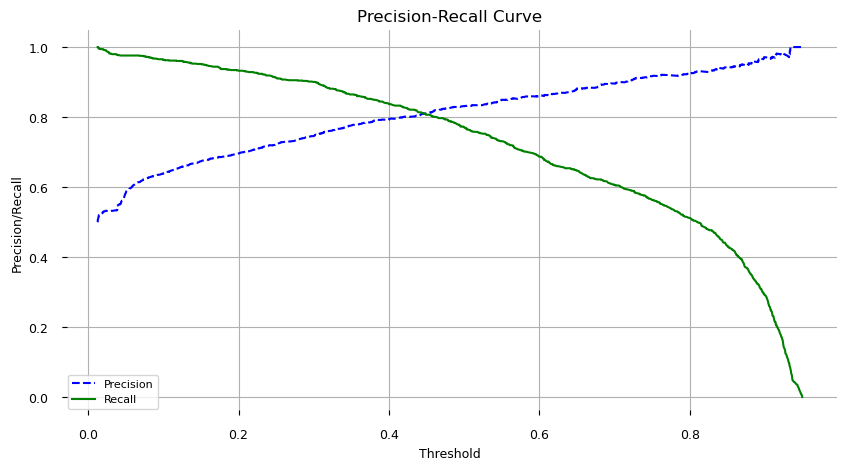

In [229]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(tree_clf,x_test, y_test, cv=3, method='predict_proba')[:, 1]


# Gerar as curvas de precisão e recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Função para plotar a curva precision-recall
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)

# Plotar a curva
plt.figure(figsize=(10,5))
plot_precision_recall(precisions, recalls, thresholds)
plt.legend()
plt.grid(True)
plt.show()

In [230]:
y_scores = cross_val_predict(tree_clf,x_test, y_test, cv=3, method='predict_proba')[:, 1]

#pegando threshold onde precision >= 0.7 para nos aproximarmos de 90% de precisão

threshold = 0.78

y_pred = (y_scores >= threshold).astype(int)
print(round(precision_score(y_test, y_pred, zero_division=1)*100,4))
print(round(recall_score(y_test, y_pred, zero_division=1)*100,2))

92.2428
52.85


Atingimos mais de 90% de Precisão porém a aproximadamente 52% de Recall. O modelo aparenta estar excelente

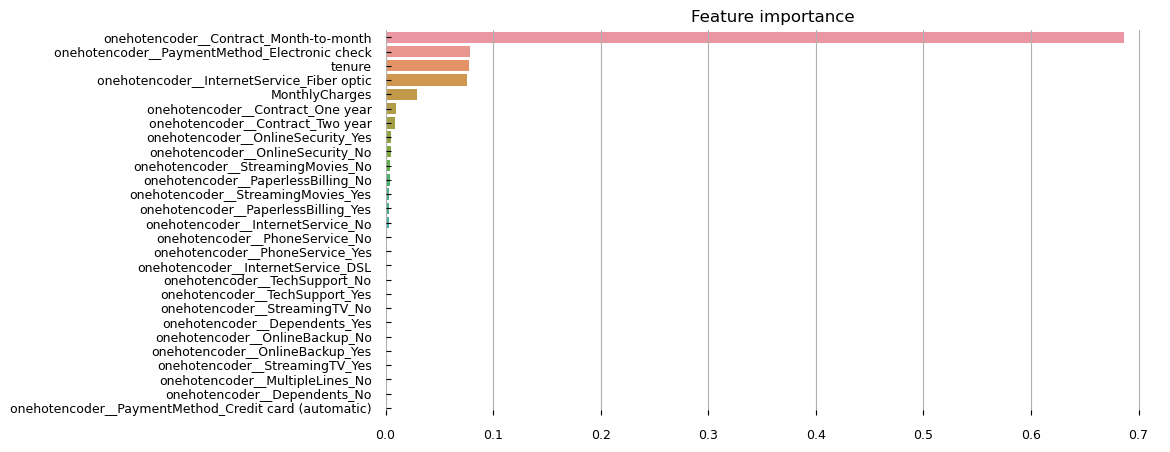

In [231]:
fimp = pd.DataFrame(data=tree_clf.feature_importances_, index=X_smote_train.columns).sort_values(by=0,ascending=False)
fimp = fimp.loc[fimp[0] > 0]
plt.figure(figsize=(10,5))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp[0].values,  orient='h')

Para nosso modelo, contratos Mes a Mes, pagamentos em check eletrônico, tenure e valores mensais mais impactam o Churn.</br>
Comprovando nossa ánalise prévia

Avaliando a Feature mais importante para o Modelo

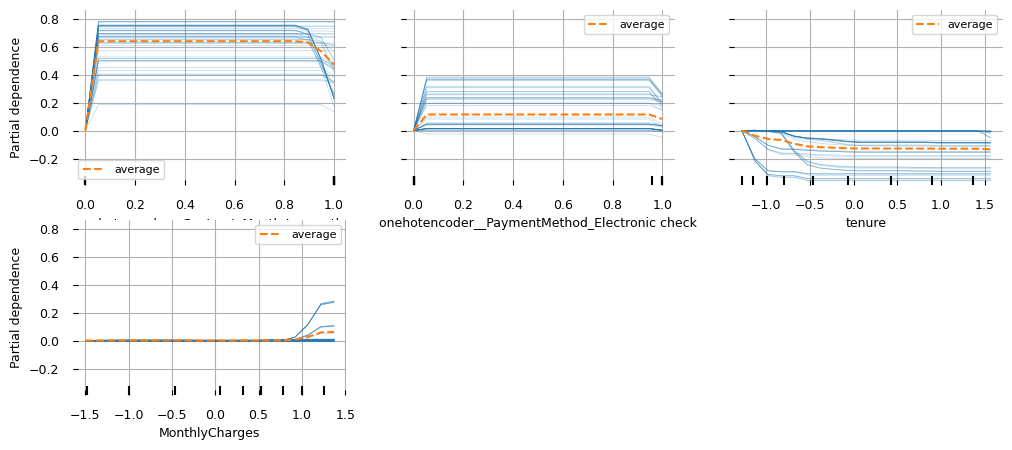

In [234]:
from sklearn.inspection import PartialDependenceDisplay
common_params = {
    "subsample" : 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}
features = ['onehotencoder__Contract_Month-to-month','onehotencoder__PaymentMethod_Electronic check','tenure','MonthlyCharges']

_, ax = plt.subplots(figsize=(12,5))
PartialDependenceDisplay.from_estimator(tree_clf, X_smote_train, features,
                                         centered=True, kind='both', **common_params, ax=ax)
plt.show()

### Como as variáveis impactam a previsão?

- Monthly Charges impacta positivamente apenas quando é maior que 1 (indica que quanto maior a cobrança maior a probabilidade de Churn)
- Permanência impacta negativamente quando a medida que aumenta (indica que quanto maior a permanência menor probabilidade de churn)
- Contrato Mensal impacta muito o modelo assim como pagamentos eletrônicos

### Recomendações:

- Avaliar velocidade de processamento:
   - Podemos usar outros algoritmos como XGBoost, Bagging methods ou ate HistGradient para performances mais velozes
- Avaliar em um dataset de validação
    - Podemos criar um novo dataset de validação para testar ainda mais o modelo
- Diminuir mais a variância do modelo 